In [229]:
data_filename = '/content/drive/MyDrive/Dataset/Titanic-Dataset.csv'

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
df = pd.read_csv(data_filename)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
#checknull
print(df.isnull())
#sum of all null
print(df.isnull().sum())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

<Axes: >

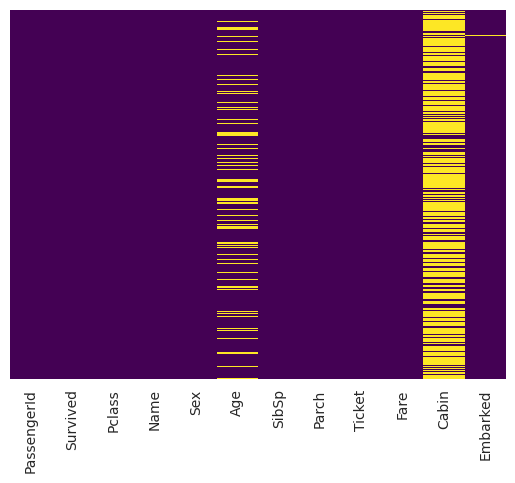

In [233]:
#checks null val using graph
sns.heatmap(df.isnull(), yticklabels=False ,cbar=False,cmap='viridis')
#cabar for side color bar
#viridis for good visiblity

Survived
0    549
1    342
Name: count, dtype: int64


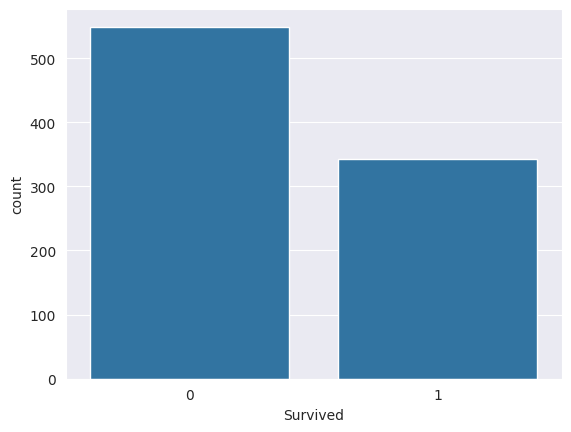

In [234]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


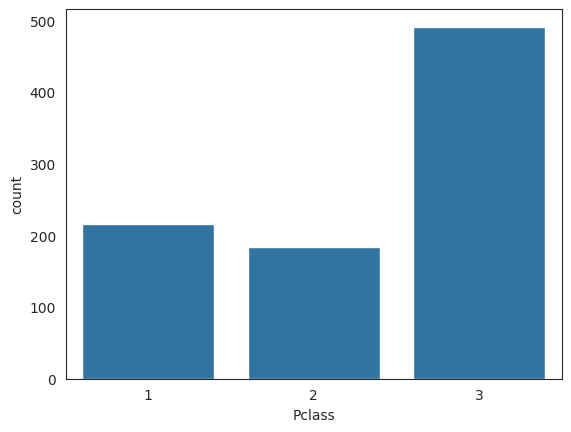

In [235]:
sns.set_style('white')
sns.countplot(x='Pclass',data=df)
print(df['Pclass'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


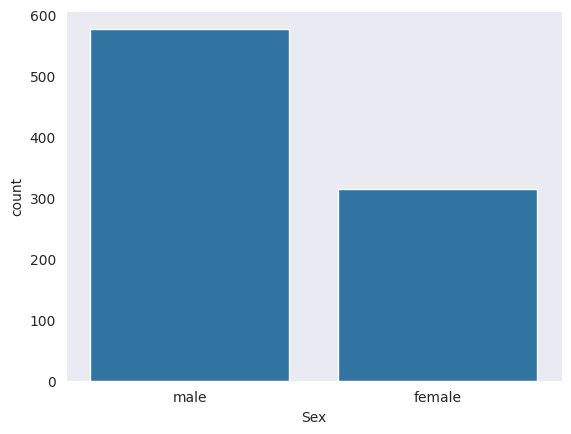

In [236]:
sns.set_style('dark')
sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

<Axes: xlabel='Survived', ylabel='count'>

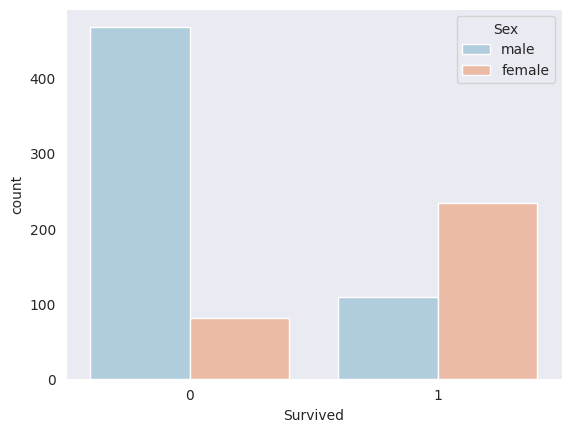

In [237]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

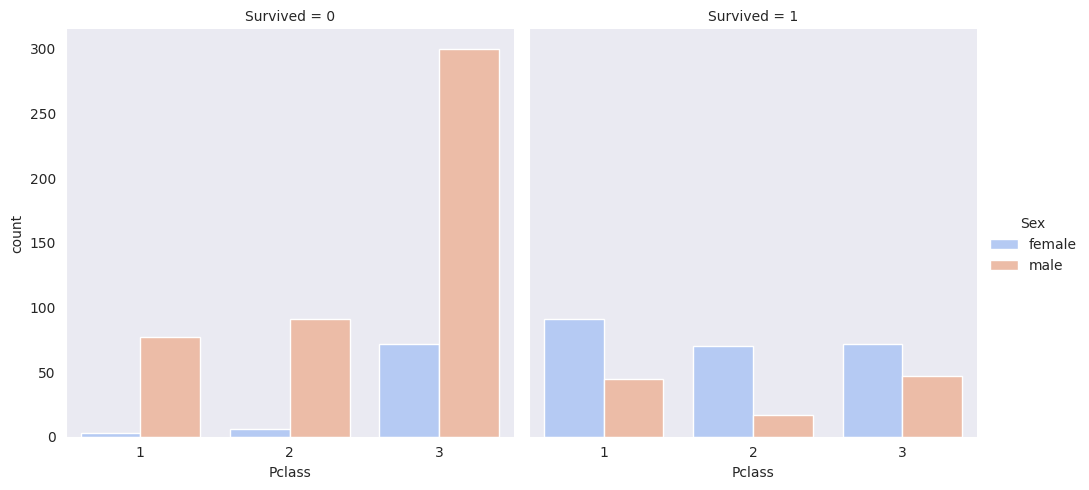

In [238]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=df, kind="count", palette="coolwarm")
plt.show()

80.0
0.42


<ipython-input-239-336135c046de>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




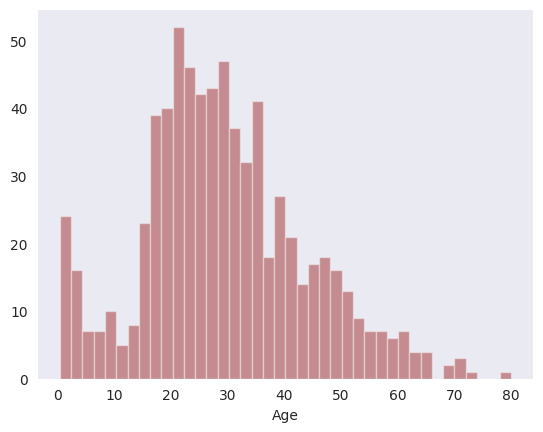

In [239]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)
print(df['Age'].max())
print(df['Age'].min())

<Axes: xlabel='SibSp', ylabel='count'>

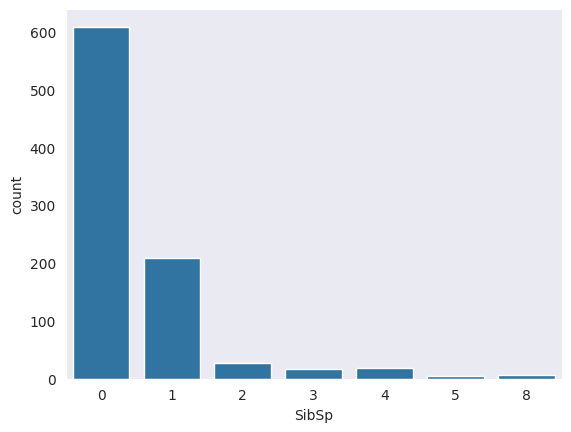

In [240]:
sns.countplot(x='SibSp',data=df)

32.204207968574636
512.3292
0.0


<Axes: >

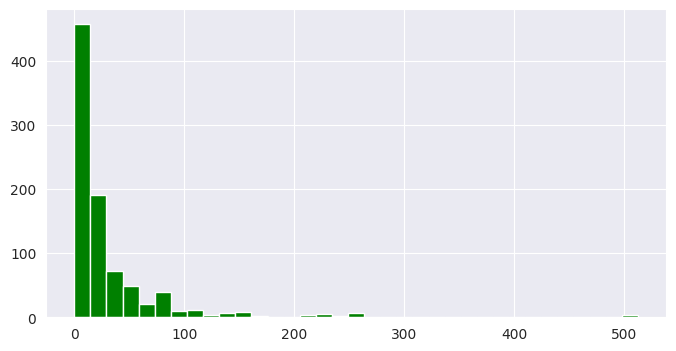

In [241]:
print(df['Fare'].mean())
print(df['Fare'].max())
print(df['Fare'].min())
df['Fare'].hist(color='green',bins=35,figsize=(8,4))

In [242]:
#data cleaning
df.groupby('Pclass')['Age'].median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [243]:
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))

<Axes: >

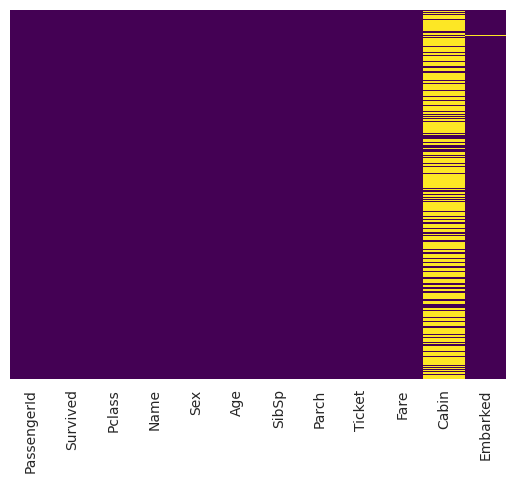

In [244]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [245]:
df.drop('Name',axis=1,inplace=True)

In [246]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [248]:
Sex = pd.get_dummies(df['Sex'], drop_first=True).astype(int)

In [249]:
Embarked = pd.get_dummies(df['Embarked'],drop_first=True).astype(int)

In [250]:
df.drop(['Sex','Embarked','Ticket','Cabin'],axis=1,inplace=True)

In [251]:
df = pd.concat([df,Sex,Embarked], axis=1)

In [252]:
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
